In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\nagor\Documents\Thebridge\Machine_Learning\imdb\src\data\final_df.csv')

In [4]:
df

,averageRating,rating_cat,numVotes,titleType,primaryTitle,startYear,runtimeMinutes,genres,primaryName,titleType_num,...,Documentary,War,Sport,Musical,Western,Adult,Reality-TV,Talk-Show,News,Game-Show
0,6.4,regular,91761,movie,Kate & Leopold,2001.0,118.0,"Comedy,Fantasy,Romance",Hugh Jackman,0,...,0,0,0,0,0,0,0,0,0,0
1,6.4,regular,373,movie,"Another Time, Another Place",1983.0,118.0,"Drama,War",Giovanni Mauriello,0,...,0,1,0,0,0,0,0,0,0,0
2,7.4,buena,2096,movie,Let There Be Light,1980.0,58.0,"Documentary,War",Walter Huston,0,...,1,1,0,0,0,0,0,0,0,0
3,6.1,regular,175,movie,"Habla, mudita",1973.0,88.0,Drama,José Luis López Vázquez,0,...,0,0,0,0,0,0,0,0,0,0
4,3.5,mala,199,short,Crossroads of Laredo,1995.0,30.0,"Short,Western",Edward D. Wood Jr.,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254627,3.6,mala,263,movie,Safeguard,2020.0,95.0,"Action,Adventure,Thriller",Patrick Gallagher,0,...,0,0,0,0,0,0,0,0,0,0
254628,8.0,buena,274,tvEpisode,The Great Experiment,2019.0,43.0,"Drama,Thriller",Tim Daly,2,...,0,0,0,0,0,0,0,0,0,0
254629,8.0,buena,319,tvEpisode,Better Angels,2019.0,42.0,"Drama,Thriller",Tim Daly,2,...,0,0,0,0,0,0,0,0,0,0
254630,5.8,regular,1507,movie,Il talento del calabrone,2020.0,84.0,Thriller,Sergio Castellitto,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_linear = df.drop(columns=['genres', 'titleType', 'primaryTitle', 'rating_cat', 'primaryName', 'log_numVotes'], inplace=False)

In [6]:
df_linear

,averageRating,numVotes,startYear,runtimeMinutes,titleType_num,decade,actor_mean_rating,Drama,Comedy,Action,...,Documentary,War,Sport,Musical,Western,Adult,Reality-TV,Talk-Show,News,Game-Show
0,6.4,91761,2001.0,118.0,0,2000.0,6.8,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,6.4,373,1983.0,118.0,0,1980.0,6.4,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,7.4,2096,1980.0,58.0,0,1980.0,7.4,0,0,0,...,1,1,0,0,0,0,0,0,0,0
3,6.1,175,1973.0,88.0,0,1970.0,6.5,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.5,199,1995.0,30.0,1,1990.0,3.5,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254627,3.6,263,2020.0,95.0,0,2020.0,5.2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
254628,8.0,274,2019.0,43.0,2,2010.0,7.6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
254629,8.0,319,2019.0,42.0,2,2010.0,7.6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
254630,5.8,1507,2020.0,84.0,0,2020.0,6.4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TOCA SEPARAR TRAIN TEST SPLIT 

In [5]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline

In [6]:
# Seleccionamos las variables predictoras y la variable objetivo
X = df_linear.drop(['averageRating'], axis=1)
y = df_linear['averageRating']

# Realizamos el train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:

X_train.drop(columns=['actor_mean_rating'], inplace=True)

In [8]:
X_test.drop(columns=['actor_mean_rating'], inplace=True)

In [9]:
# escalemos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)
# Creamos el modelo de Lasso

## MODELOS PREDICTIVOS :

#### REGRESIÓN

##### Linear Regression

In [12]:
## empezemos con lo más sencillo, linear regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [13]:
# predigamos el resultado 

y_pred = lr.predict(X_test_scaled)
# evaluamos el modelo
y_pred

array([5.77718029, 7.73596137, 6.46411511, ..., 8.14201965, 6.57169414,
       5.2791332 ])

In [14]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')    
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
# Visualizamos los resultados

MSE: 1.2222609828582627
MAE: 0.8253235215928865
RMSE: 1.1055591268033849
R2: 0.3717165556362839


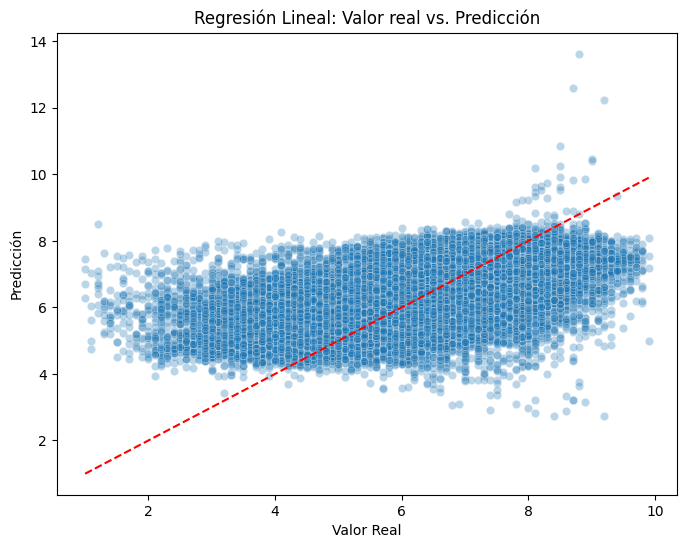

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # línea ideal
plt.xlabel("Valor Real")
plt.ylabel("Predicción")
plt.title("Regresión Lineal: Valor real vs. Predicción")
plt.show()

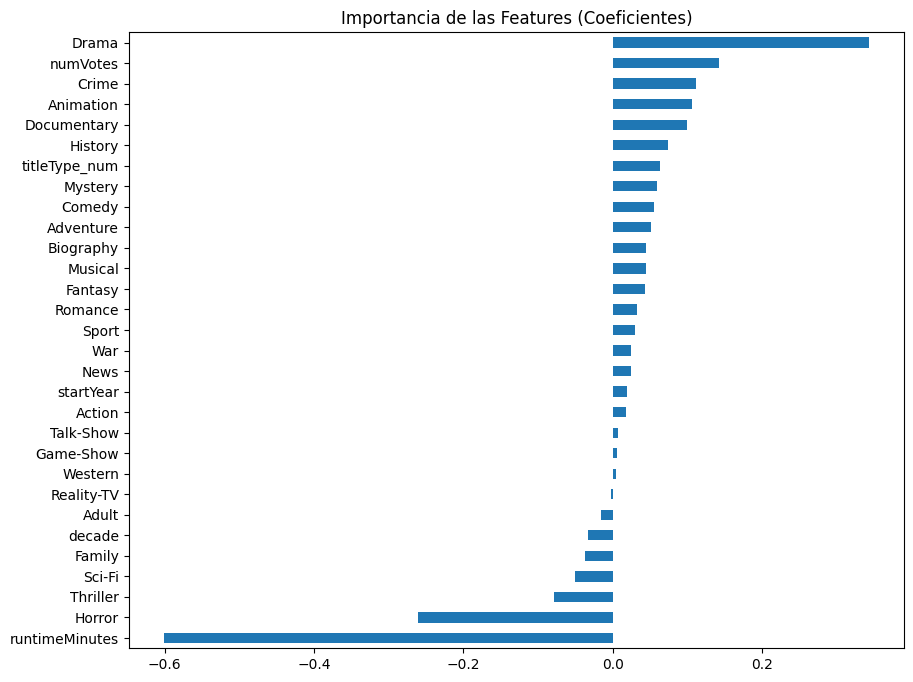

In [16]:
coefficients = pd.Series(lr.coef_, index=X_train.columns)
coefficients = coefficients.sort_values()
coefficients.plot(kind='barh', figsize=(10, 8), title='Importancia de las Features (Coeficientes)')
plt.show()

#### RANDOM FOREST

In [18]:
# MODELO CON RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42, min_samples_split=2, min_samples_leaf=2)
rf.fit(X_train, y_train)
# predigamos el resultado
y_pred_rf = rf.predict(X_test)
# evaluamos el modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print(f'MSE: {mse_rf}')
print(f'MAE: {mae_rf}')
print(f'RMSE: {rmse_rf}')
print(f'R2: {r2_rf}')
# Visualizamos los resultados

MSE: 0.6666371820399616
MAE: 0.5697294472334674
RMSE: 0.816478525155415
R2: 0.6573259633196044


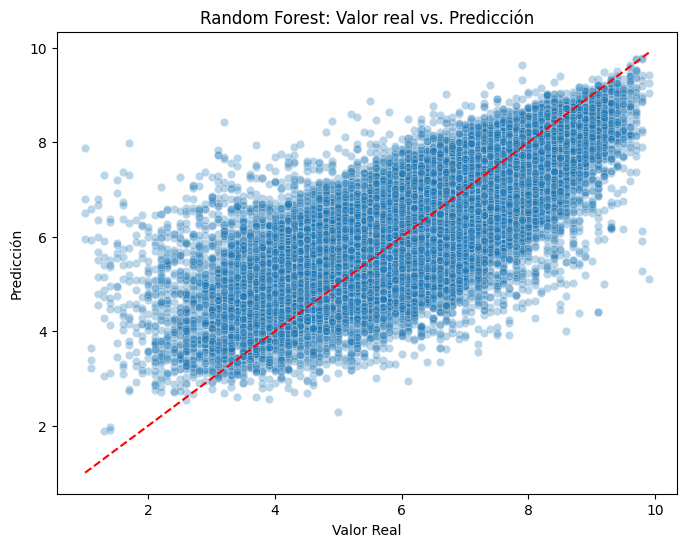

In [19]:
# graficamos el resultado   
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.3)   
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # línea ideal
plt.xlabel("Valor Real")
plt.ylabel("Predicción")
plt.title("Random Forest: Valor real vs. Predicción")
plt.show()
# graficamos la importancia de las variables

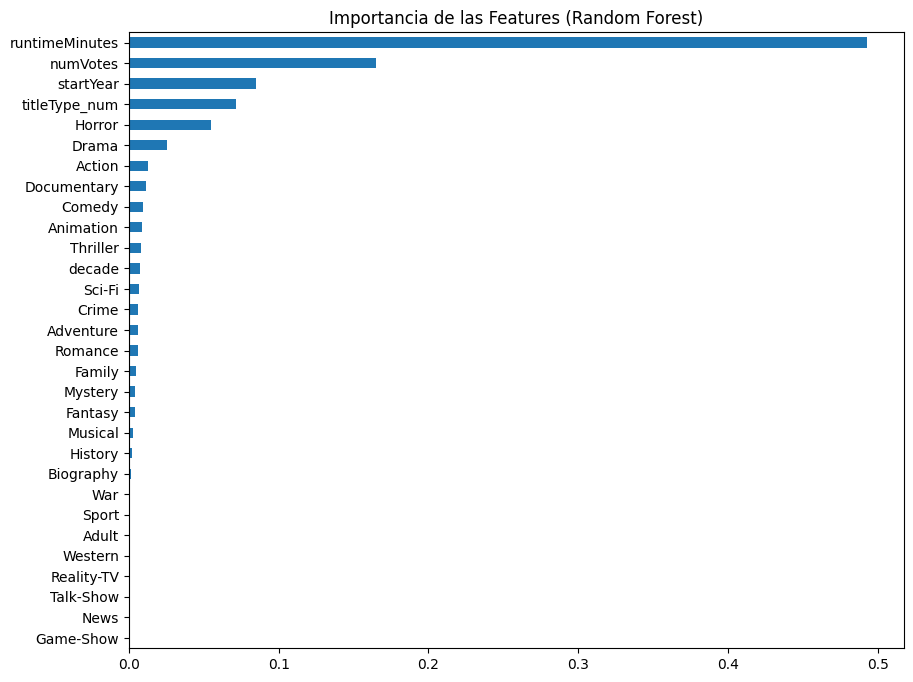

In [ ]:
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances = importances.sort_values()
importances.plot(kind='barh', figsize=(10, 8), title='Importancia de las Features (Random Forest)')
plt.show()

In [20]:
#MODELO xgboost
import xgboost as xgb
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb.predict(X_test)

# Evaluación
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'MSE: {mse_xgb}')
print(f'MAE: {mae_xgb}')
print(f'RMSE: {rmse_xgb}')
print(f'R2: {r2_xgb}')

MSE: 0.6929262640339191
MAE: 0.6038268063779849
RMSE: 0.8324219266897762
R2: 0.6438124868886552


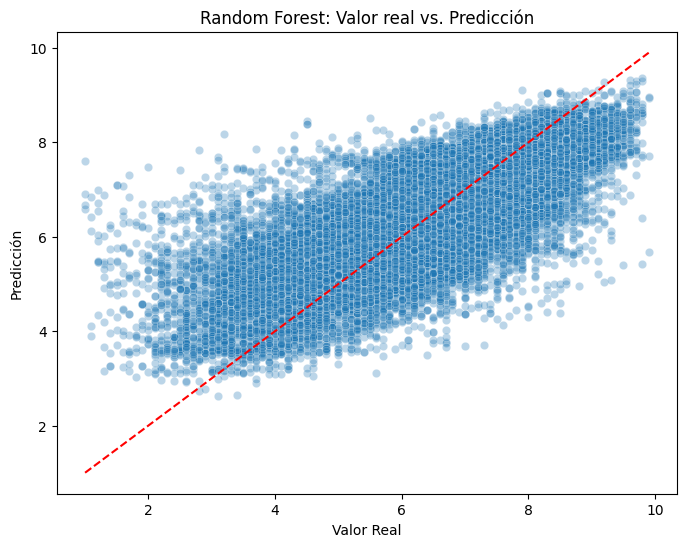

In [ ]:
# graficamos el resultado   
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.3)   
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # línea ideal
plt.xlabel("Valor Real")
plt.ylabel("Predicción")
plt.title("Random Forest: Valor real vs. Predicción")
plt.show()
# graficamos la importancia de las variables

In [ ]:
# Modelo ajustado con nuevos hiperparámetros
xgb = XGBRegressor(
    n_estimators=300,        # Más árboles para mejorar el aprendizaje
    learning_rate=0.05,      # Más bajo para aprender más lento pero con mayor precisión
    max_depth=8,             # Mayor profundidad para capturar relaciones complejas
    subsample=0.9,           # Más muestras por árbol
    colsample_bytree=0.9,    # Más features por árbol
    min_child_weight=3,      # Control del crecimiento del árbol
    gamma=0.1,               # Regularización adicional
    random_state=42,
    n_jobs=-1                # Usa todos los núcleos del procesador
)

xgb.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb.predict(X_test)

# Evaluación
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'MSE: {mse_xgb}')
print(f'MAE: {mae_xgb}')
print(f'RMSE: {rmse_xgb}')
print(f'R2: {r2_xgb}')

MSE: 0.6573425584638385
MAE: 0.58326401957042
RMSE: 0.810766648588753
R2: 0.662103713895275


In [ ]:
#vamos a hacer un grid search para ver si podemos mejorar el modelo
from sklearn.model_selection import GridSearchCV

# Parámetros para probar en GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Modelo base
xgb = XGBRegressor(random_state=42, verbosity=0)

# Configuración de GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Ajuste del modelo
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_xgb = grid_search.best_estimator_

# Predicción
y_pred = best_xgb.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Resultados
print("Mejores parámetros:", grid_search.best_params_)
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

In [ ]:
#grdient boosting
from sklearn.ensemble import GradientBoostingRegressor  

gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=1.0,
    random_state=42
)   

gbr.fit(X_train, y_train)
# predigamos el resultado
y_pred_gbr = gbr.predict(X_test)
# evaluamos el modelo


# Evaluación
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f'MSE: {mse_gbr}')
print(f'MAE: {mae_gbr}')
print(f'RMSE: {rmse_gbr}')
print(f'R2: {r2_xgb}')

MSE: 0.7585709767302544
MAE: 0.6374467379414815
RMSE: 0.8709598020174378
R2: 0.662103713895275


##### Vamos a tabajar redes neuronales 

In [10]:
import tensorflow as tf 

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential


In [27]:

# Definición del modelo

model = keras.models.Sequential([
    keras.layers.Dense(31, activation = 'relu',
                      input_shape = X_train_scaled.shape[1:]),   #capa de entrada
    keras.layers.Dense(15, activation = 'relu'),  #capa oculta
    keras.layers.Dense(1)]) # para salida 

#compilamos
model.compile(loss = "mse", # error cuadrático medio
             optimizer =tf.keras.optimizers.RMSprop(0.001), metrics = ["mae", "mse"]) # error absoluto medio


In [12]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
history = model.fit(X_train_scaled,
                   y_train,
                   epochs = 1000 ,
                   validation_split=0.2, 
                   callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)],
                   batch_size=32,
                   )

Epoch 1/1000
5093/5093 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 6.3568 - mae: 1.5703 - mse: 6.3568 - val_loss: 0.9289 - val_mae: 0.7185 - val_mse: 0.9289
Epoch 2/1000
5093/5093 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.9067 - mae: 0.7047 - mse: 0.9067 - val_loss: 0.8477 - val_mae: 0.6800 - val_mse: 0.8477
Epoch 3/1000
5093/5093 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.8542 - mae: 0.6793 - mse: 0.8542 - val_loss: 0.8222 - val_mae: 0.6681 - val_mse: 0.8222
Epoch 4/1000
5093/5093 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.8238 - mae: 0.6670 - mse: 0.8238 - val_loss: 0.8325 - val_mae: 0.6847 - val_mse: 0.8325
Epoch 5/1000
5093/5093 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.8024 - mae: 0.6607 - mse: 0.8024 - val_loss: 0.8104 - val_mae: 0.6618 - val_mse: 0.8104
Epoch 6/1000
5093/5093 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.8011 - mae: 0.6575 - mse: 0.8011 - val_loss: 0.7954 - val_mae: 0.6560 - val_mse: 0.7954
Epoch 7/1000
5093/5093 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.7960 - mae

In [34]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 31)             │           961 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 15)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,916 (11.39 KB)

 Trainable params: 1,457 (5.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,459 (5.70 KB)

In [35]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

1592/1592 ━━━━━━━━━━━━━━━━━━━━ 2s 961us/step - loss: 2429696.0000 - mae: 563.2028 - mse: 2429696.0000
[2559913.5, 563.7385864257812, 2559913.5]


In [ ]:
y_pred = model.predict(X_test[:5]) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


array([[ -62.227978],
       [ -80.681404],
       [-196.38242 ],
       [ -58.813858],
       [-741.5871  ]], dtype=float32)

In [46]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # salida para regresión
])

# Compilación
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

#  Entrenamiento
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluación
y_pred = model.predict(X_test_scaled).flatten()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R2: {r2:.4f}')

c:\Users\nagor\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
5093/5093 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 2.6826 - mae: 1.1712 - mse: 2.6826 - val_loss: 0.9625 - val_mae: 0.7606 - val_mse: 0.9625
Epoch 2/300
5093/5093 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 1.1307 - mae: 0.8200 - mse: 1.1307 - val_loss: 0.8454 - val_mae: 0.6957 - val_mse: 0.8454
Epoch 3/300
5093/5093 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.9840 - mae: 0.7558 - mse: 0.9840 - val_loss: 0.7814 - val_mae: 0.6536 - val_mse: 0.7814
Epoch 4/300
5093/5093 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.9159 - mae: 0.7239 - mse: 0.9159 - val_loss: 0.7728 - val_mae: 0.6497 - val_mse: 0.7728
Epoch 5/300
5093/5093 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.8649 - mae: 0.6997 - mse: 0.8649 - val_loss: 0.7606 - val_mae: 0.6379 - val_mse: 0.7606
Epoch 6/300
5093/5093 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.8397 - mae: 0.6849 - mse: 0.8397 - val_loss: 0.7518 - val_mae: 0.6349 - val_mse: 0.7518
Epoch 7/300
5093/5093 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.8127 - mae: 0.671

In [13]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint, uniform


In [14]:
# Evaluar en el conjunto de prueba
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:



# Definir el modelo base
model = RandomForestRegressor(random_state=42)

# Definir el espacio de búsqueda
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,  # Número de combinaciones a probar
    cv=5,  # Validación cruzada de 5 pliegues
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

# Ajustar el modelo
random_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = random_search.best_estimator_



y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R2: {r2:.4f}')


c:\Users\nagor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
85 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
49 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\nagor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\nagor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\nagor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.p

MSE: 0.6586
MAE: 0.5806
R2: 0.6615


In [51]:
!pip install bayesian-optimization

  Using cached numpy-2.2.5-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.5-cp311-cp311-win_amd64.whl (12.9 MB)

  Attempting uninstall: numpy

    Found existing installation: numpy 1.23.5

   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
    Uninstalling numpy-1.23.5:
   ---------------------------------------- 0/2 [numpy]
      Successfully uninstalled numpy-1.23.5
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ----------------------------------------

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.


In [52]:
from bayes_opt import BayesianOptimization

#Modelo base para optimización
def nn_model(hidden1, hidden2, learning_rate):
    hidden1 = int(hidden1)
    hidden2 = int(hidden2)
    learning_rate = float(learning_rate)

    model = keras.Sequential([
        keras.layers.Dense(hidden1, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(hidden2, activation='relu'),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='mse', metrics=['mae'])

    model.fit(
        X_train_scaled, y_train,
        validation_split=0.2,
        epochs=50,  # Reducido
        batch_size=16,  
        verbose=0,
        callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
    )

    loss, _ = model.evaluate(X_test_scaled, y_test, verbose=0)
    return -loss

# Rango de parámetros 
pbounds = {
    'hidden1': (16, 64),
    'hidden2': (16, 64),
    'learning_rate': (0.0005, 0.005)
}

# Búsqueda bayesiana
optimizer = BayesianOptimization(
    f=nn_model,
    pbounds=pbounds,
    random_state=42
)
optimizer.maximize(init_points=3, n_iter=7)

# Entrenar modelo final con los mejores parámetros
best_params = optimizer.max['params']
model_final = keras.Sequential([
    keras.layers.Dense(int(best_params['hidden1']), activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(int(best_params['hidden2']), activation='relu'),
    keras.layers.Dense(1)
])
model_final.compile(optimizer=keras.optimizers.Adam(learning_rate=best_params['learning_rate']),
                    loss='mse', metrics=['mae'])

model_final.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=0,
    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
)

# Evaluación
y_pred = model_final.predict(X_test_scaled).flatten()
print(f'MSE: {mean_squared_error(y_test, y_pred):.4f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred):.4f}')
print(f'R2: {r2_score(y_test, y_pred):.4f}')


|   iter    |  target   |  hidden1  |  hidden2  | learni... |
-------------------------------------------------------------


c:\Users\nagor\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 1         | -0.7234   | 33.98     | 61.63     | 0.003794  |


c:\Users\nagor\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 2         | -0.7211   | 44.74     | 23.49     | 0.001202  |


c:\Users\nagor\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 3         | -0.7417   | 18.79     | 57.58     | 0.003205  |


c:\Users\nagor\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 4         | -0.7165   | 44.92     | 23.82     | 0.001552  |


c:\Users\nagor\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 5         | -0.7168   | 46.24     | 24.03     | 0.003582  |


c:\Users\nagor\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 6         | -0.7251   | 45.31     | 25.41     | 0.002673  |


c:\Users\nagor\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 7         | -0.7151   | 46.85     | 22.74     | 0.00115   |


c:\Users\nagor\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 8         | -0.7182   | 47.95     | 23.54     | 0.001697  |


c:\Users\nagor\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 9         | -0.726    | 47.87     | 21.69     | 0.003753  |


c:\Users\nagor\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 10        | -0.7315   | 47.71     | 25.03     | 0.00478   |


c:\Users\nagor\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1592/1592 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
MSE: 0.7193
MAE: 0.6207
R2: 0.6303


In [ ]:
# Definir el modelo base
from sklearn.ensemble import GradientBoostingRegressor
model_gbx = GradientBoostingRegressor(random_state=42)


# Definir el espacio de búsqueda
param_dist = {
    'n_estimators': [50,100,200],
    'max_depth': [3, 5, 7, 9, 11, 13, 15],
    'min_samples_split': [3,5,7,9],
    'min_samples_leaf': [5, 9, 12],
    'max_features': ['sqrt', 'log2'],  
    'learning_rate': [0.01, 0.05, 0.1, 0.2]  
}

# Configurar GradientBoostingRegressor
random_search = RandomizedSearchCV(
    estimator=model_gbx,
    param_distributions=param_dist,
    n_iter=20,  # Número de combinaciones a probar
    cv=5,  # Validación cruzada de 5 pliegues
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

# Ajustar el modelo
random_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = random_search.best_estimator_

# Evaluar en el conjunto de prueba
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R2: {r2:.4f}')

MSE: 0.6380
MAE: 0.5679
R2: 0.6720


In [3]:
import pandas as pd

C:\Users\nagor\AppData\Local\Temp\ipykernel_18244\2100906876.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='MSE', y='Modelo', ax=axes[0], palette='Reds_r')
C:\Users\nagor\AppData\Local\Temp\ipykernel_18244\2100906876.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='MAE', y='Modelo', ax=axes[1], palette='Oranges_r')
C:\Users\nagor\AppData\Local\Temp\ipykernel_18244\2100906876.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='R2', y='Modelo', ax=axes[2], palette='Greens_r')


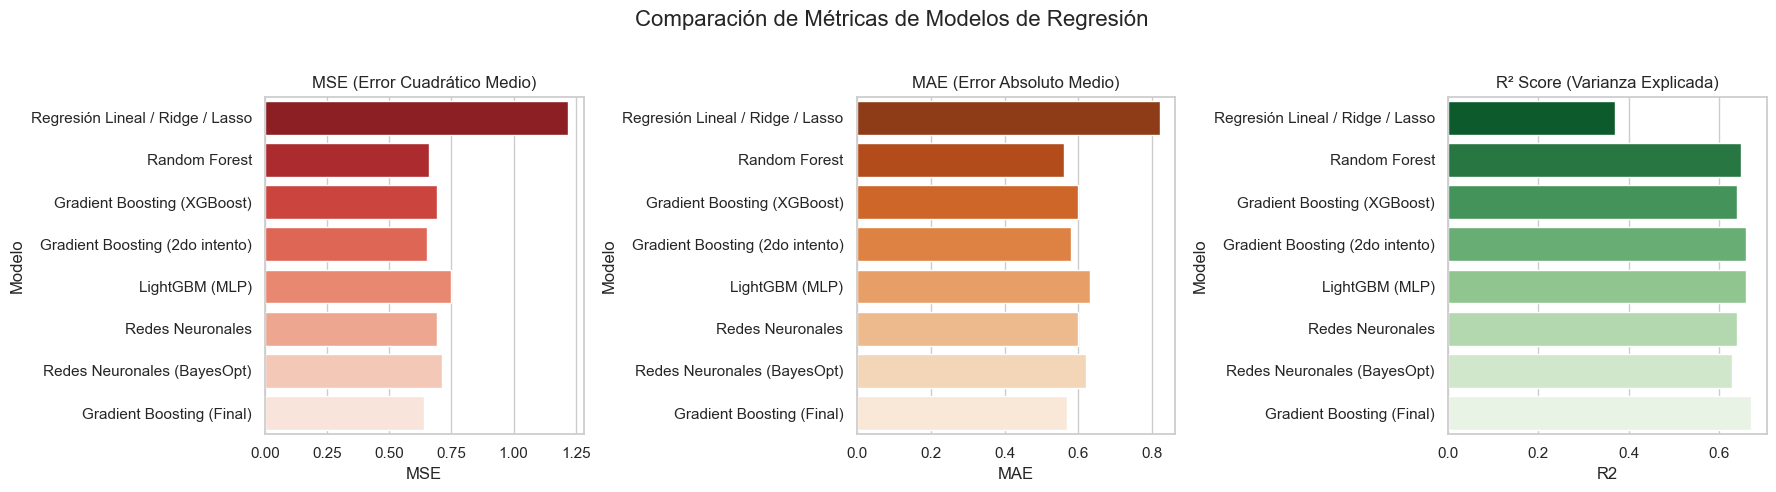

In [4]:
# Datos de métricas por modelo
data = {
    'Modelo': [
        'Regresión Lineal / Ridge / Lasso',
        'Random Forest',
        'Gradient Boosting (XGBoost)',
        'Gradient Boosting (2do intento)',
        'LightGBM (MLP)',
        'Redes Neuronales',
        'Redes Neuronales (BayesOpt)',
        'Gradient Boosting (Final)'
    ],
    'MSE': [1.22, 0.66, 0.69, 0.65, 0.75, 0.69, 0.71, 0.638],
    'MAE': [0.82, 0.56, 0.60, 0.58, 0.63, 0.60, 0.62, 0.5679],
    'R2': [0.37, 0.65, 0.64, 0.66, 0.66, 0.64, 0.63, 0.672]
}

df = pd.DataFrame(data)

# Estilo
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# MSE
sns.barplot(data=df, x='MSE', y='Modelo', ax=axes[0], palette='Reds_r')
axes[0].set_title('MSE (Error Cuadrático Medio)')

# MAE
sns.barplot(data=df, x='MAE', y='Modelo', ax=axes[1], palette='Oranges_r')
axes[1].set_title('MAE (Error Absoluto Medio)')

# R²
sns.barplot(data=df, x='R2', y='Modelo', ax=axes[2], palette='Greens_r')
axes[2].set_title('R² Score (Varianza Explicada)')

# Ajustar diseño
plt.suptitle('Comparación de Métricas de Modelos de Regresión', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()